In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [2]:
TS_CSV = './628_pop2_s_ts.csv'
CONFIG_CSV='./628_pop2_s_regret_out.csv'

In [3]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003280,0.007871,0.003647,0.006502,0.006609,0.006576,0.006408,0.004831,0.003407,...,0.003309,0.003290,0.003173,0.006541,0.003189,0.003283,0.006511,0.003287,0.003231,0.006265
1,1,0.269749,0.318499,0.262796,0.278002,0.272701,0.292005,0.267734,0.271841,0.255885,...,0.272007,0.262955,0.273139,0.290724,0.263617,0.000000,0.289069,0.265138,0.269856,0.302244
2,2,0.221258,0.235854,0.206525,0.228765,0.212346,0.220953,0.220392,0.213004,0.208822,...,0.205779,0.206366,0.206480,0.224590,0.212466,0.206600,0.223088,0.212287,0.221196,0.224875
3,3,0.221261,0.236189,0.206804,0.228451,0.212430,0.221151,0.220473,0.213303,0.208832,...,0.205847,0.206613,0.206532,0.224463,0.212582,0.206571,0.223347,0.212349,0.219425,0.224879
4,4,0.221216,0.236189,0.208679,0.230115,0.214302,0.223023,0.222134,0.215178,0.210143,...,0.207726,0.208352,0.208056,0.226339,0.214461,0.208310,0.225206,0.211521,0.221303,0.226543


In [4]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
0,True,True,17270,disabled,3,13,2,auto,20132,385,5687628,phycpu,False,True,always,False,42.451918
1,False,False,43466,secondary,18,29,77,disabled,42791,214,23510693,percpu,True,False,default,True,-6.957036
2,False,True,966,disabled,22,23,39,always,32082,7,31578455,disabled,False,True,always,False,37.803907
3,True,False,25406,secondary,8,5,45,always,4736,517,13741752,phycpu,True,False,never,True,9.273506
4,True,True,49779,secondary,10,9,27,always,25244,276,28857626,phycpu,False,False,never,True,17.279699


In [6]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
47,False,False,1506,disabled,11,2,51,auto,15,446,93612,phycpu,True,False,default,True,-11.032978
35,False,False,4643,secondary,9,2,33,disabled,4735,461,86795,phycpu,True,False,default,True,-10.925387
42,False,False,714,primary,12,2,58,disabled,324,451,124606,phycpu,True,False,default,True,-10.905960
40,False,False,13102,disabled,10,1,39,disabled,87,414,86795,phycpu,True,False,default,False,-10.871282
41,False,False,1689,primary,8,2,77,disabled,3946,530,53363,percpu,True,False,default,False,-10.800202


In [7]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_48', 'run_36', 'run_43']

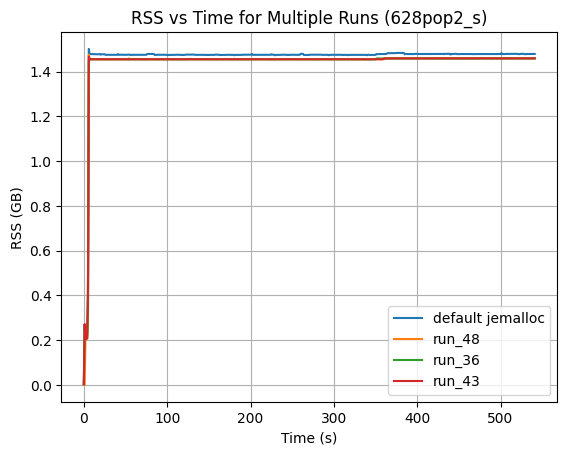

In [8]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


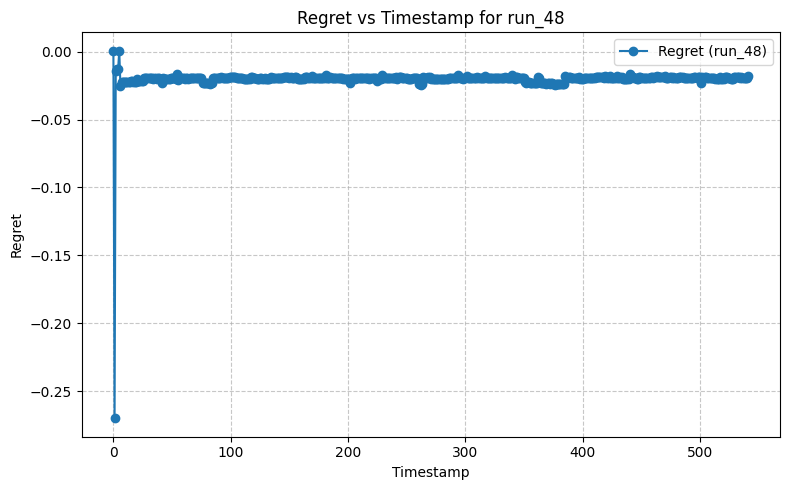

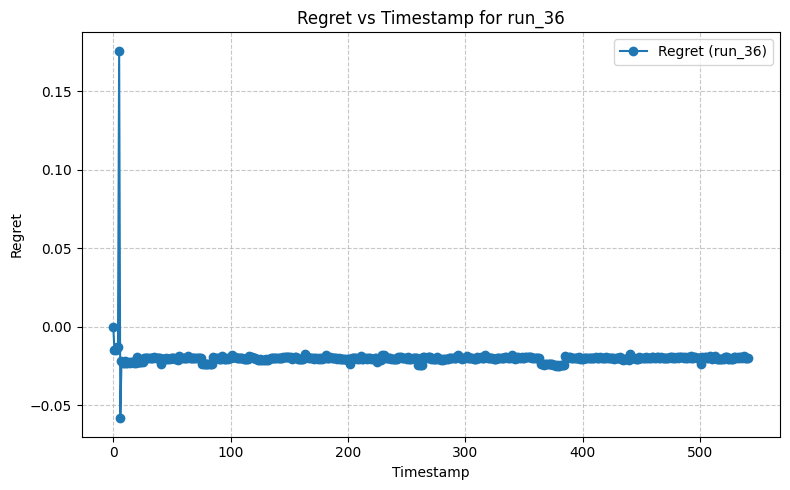

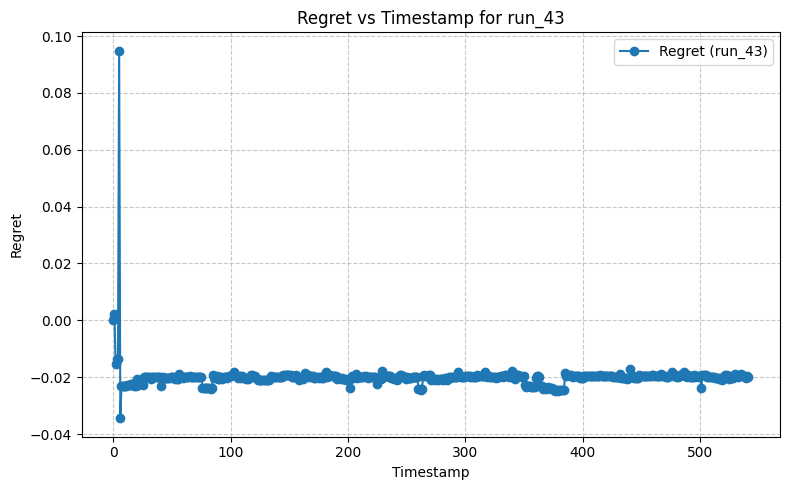

In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  (df[column] - df['run_default_jemalloc'])
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Timestamp for {column}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

In [3]:
TIMESERIES_FILE = './538_imagick_r_timeseries.csv'
csvfile = pd.read_csv(TIMESERIES_FILE)
timestamps = csvfile['Timestamp']
rss_values = csvfile['RSS'] / (1024*1024)

# Plotting the RSS values over time
plt.plot(timestamps, rss_values, label='RSS over Time', marker='o')
plt.xlabel('Time (s)')  # X-axis label
plt.ylabel('RSS (MB)')  # Y-axis label
plt.title('RSS vs Time')  # Title of the plot
plt.legend()  # Display the legend
plt.grid(True)  # Add a grid for better readability

# Display the plot in the notebook
plt.show()


EmptyDataError: No columns to parse from file